In [56]:
import os
import tensorflow as tf
import glob
import shutil
import matplotlib.image
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### Resize images

In [12]:
TRAIN_IMAGE_SAVE_DIR = 'preprocessed_data/Training'
TEST_IMAGE_SAVE_DIR = 'preprocessed_data/Testing'
TRAIN_IMAGE_DIR="/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training"
TEST_IMAGE_DIR="/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing"
train_images = os.listdir(train_directory)
test_images = os.listdir(test_directory)

In [9]:
def resize_images(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [167, 167])
    return img

In [42]:
#creates the directory where the file will be stored if it doesn't exist already
def ensure_directory_exists(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [22]:
#get the location of all train and test images
train_images = glob.glob(TRAIN_IMAGE_DIR + '/**/*.jpg', recursive=True)
test_images = glob.glob(TEST_IMAGE_DIR + '/**/*.jpg', recursive=True)

In [43]:
#resize all training images and copy them to another folder
if not os.path.exists(TRAIN_IMAGE_SAVE_DIR):
    os.makedirs(TRAIN_IMAGE_SAVE_DIR)
    
for i in train_images:
    resized_img = resize_images(os.path.join(i))
    new_image_location=i.replace("brain_tumor_classification_dataset","resized_dataset")
    ensure_directory_exists(new_image_location)
    tf.keras.utils.save_img(new_image_location, resized_img)

In [45]:
#check that the function worked ok
for dirpath, dirnames, filenames in os.walk("/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset"):
    number_of_class_files = len(filenames)
    print ("Files in ", dirpath, number_of_class_files)

Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset 0
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Training 0
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Training/pituitary_tumor 827
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Training/meningioma_tumor 822
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Training/no_tumor 395
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Training/glioma_tumor 826


In [44]:
#shutil.rmtree("/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/data") 


In [46]:
#resize all test images and copy them to another folder
if not os.path.exists(TEST_IMAGE_SAVE_DIR):
    os.makedirs(TEST_IMAGE_SAVE_DIR)
    
for i in test_images:
    resized_img = resize_images(os.path.join(i))
    new_image_location=i.replace("brain_tumor_classification_dataset","resized_dataset")
    ensure_directory_exists(new_image_location)
    tf.keras.utils.save_img(new_image_location, resized_img)

In [47]:
#check that the function worked ok
for dirpath, dirnames, filenames in os.walk("/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Testing"):
    number_of_class_files = len(filenames)
    print ("Files in ", dirpath, number_of_class_files)

Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Testing 0
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Testing/no_tumor 105
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Testing/glioma_tumor 100
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Testing/pituitary_tumor 74
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset/Testing/meningioma_tumor 115


### Check if images were resized

In [51]:
#get the name of all the resized images
filenames = list(Path("/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/resized_dataset").rglob("*.[jJ][pP][gG]"))

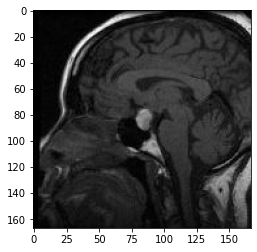

In [57]:
img = mpimg.imread(filenames[223])
imgplot = plt.imshow(img)
plt.show()

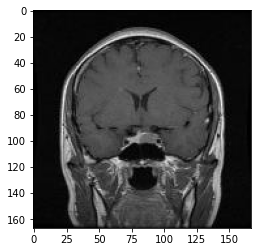

In [58]:
img = mpimg.imread(filenames[699])
imgplot = plt.imshow(img)
plt.show()

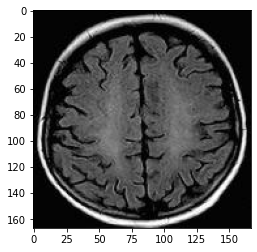

In [59]:
img = mpimg.imread(filenames[2304])
imgplot = plt.imshow(img)
plt.show()

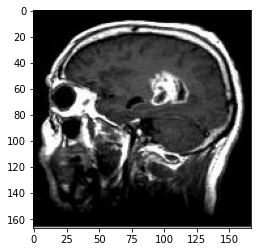

In [60]:
img = mpimg.imread(filenames[1188])
imgplot = plt.imshow(img)
plt.show()

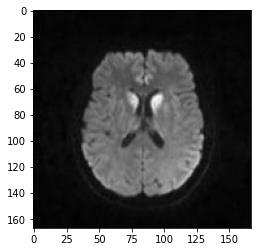

In [61]:
img = mpimg.imread(filenames[91])
imgplot = plt.imshow(img)
plt.show()

By checking some random images we can see that they were indeed resized and have a 167x167px resolution. We can also observe that the images have slightly different formats (they belong to either the axial, sagital or corronal plane), which I think will make it harder for our neural networks to classify them.